***Data loading rerec***

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# For example, here's several helpful packages to load



import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# Input data files are available in the read-only "../input/" directory

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



import os

real_audio=[]

fake_audio=[]

# fake_audio_path = ['/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/fake','/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/training/fake','/kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake','/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/fake']

# real_audio_path = ['/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/real','/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/training/real','/kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/real','/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/real']





fake_audio_path='/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/fake'

real_audio_path='/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/real'

# for _dir in fake_audio_path:

for filename in os.listdir(fake_audio_path):

    if filename.endswith('.wav'):

        fake_audio.append(os.path.join(fake_audio_path, filename))

#         print(filename)

            

# for _dir in real_audio_path:

for filename in os.listdir(real_audio_path):

    if filename.endswith('.wav'):

        real_audio.append(os.path.join(real_audio_path, filename))



# real_audio_files = [os.path.join(real_audio_path, file) for file in os.listdir(real_audio_path) if file.endswith('.wav')]

# fake_audio_files = [os.path.join(fake_audio_path, file) for file in os.listdir(fake_audio_path) if file.endswith('.wav')]



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# For-rerec dataset



print("Number of tuples in fake_audio dataset: ", len(fake_audio))

# print(fake_audio[0])





print("Number of tuples in real_audio dataset: ", len(real_audio))

# print(real_audio[0])

Number of tuples in fake_audio dataset:  5104
Number of tuples in real_audio dataset:  5104


In [3]:
import librosa

import matplotlib.pyplot as plt

import seaborn as sns

from tqdm import tqdm

import IPython

from librosa import display

from IPython import display as ipd

***For Rerecorded Audio***

> Visualise data

In [4]:
# loading audio

ipd.Audio('/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/fake/recording1.wav_norm_mono.wav')

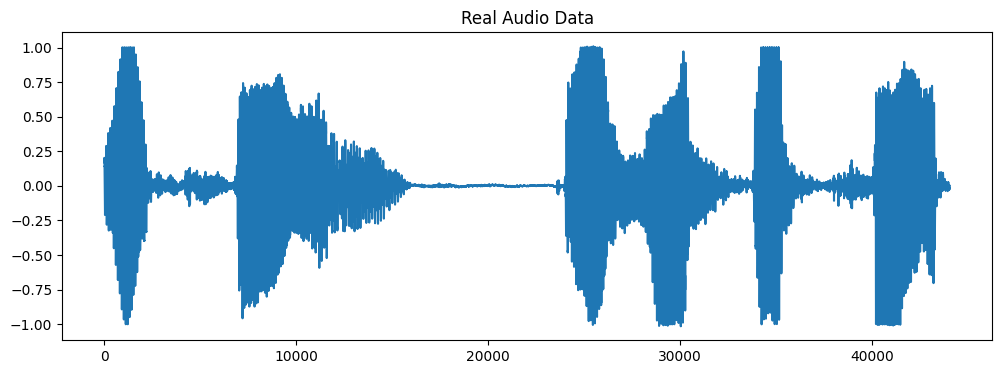

In [5]:
real_ad, real_sr = librosa.load(real_audio[0])

plt.figure(figsize=(12, 4))

plt.plot(real_ad)

plt.title("Real Audio Data")

plt.show()

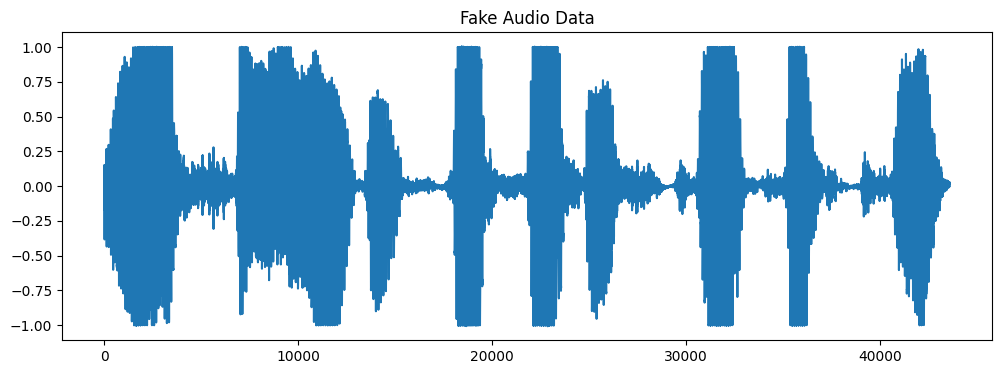

In [6]:
fake_ad, fake_sr = librosa.load(fake_audio[0])

plt.figure(figsize=(12, 4))

plt.plot(fake_ad)

plt.title("Fake Audio Data")

plt.show()

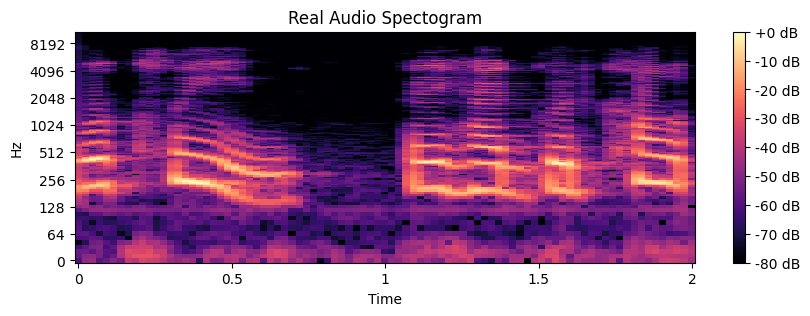

In [7]:
real_spec = np.abs(librosa.stft(real_ad))

real_spec = librosa.amplitude_to_db(real_spec, ref=np.max)



plt.figure(figsize=(10, 3))

librosa.display.specshow(real_spec, sr=real_sr, x_axis="time", y_axis="log")

plt.colorbar(format="%+2.0f dB")

plt.title("Real Audio Spectogram")

plt.show()

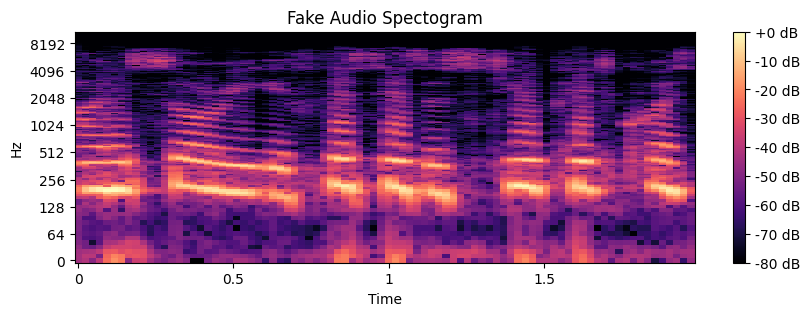

In [8]:
fake_spec = np.abs(librosa.stft(fake_ad))

fake_spec = librosa.amplitude_to_db(fake_spec, ref=np.max)



plt.figure(figsize=(10, 3))

librosa.display.specshow(fake_spec, sr=fake_sr, x_axis="time", y_axis="log")

plt.colorbar(format="%+2.0f dB")

plt.title("Fake Audio Spectogram")

plt.show()

In [9]:
# !pip install resampy

In [10]:
# def feature_extraction(file_path):

#     x, sample_rate = librosa.load(file_path)

    

#     # Check if the loaded signal is empty

#     if len(x) == 0:

#         print(f"Warning: Empty audio signal in file {file_path}")

#         return None

    

#     mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=13).T, axis=0)

#     return mfcc



# real_audio_mfcc = []

# for audio in real_audio:

#     mfcc = feature_extraction(audio)

#     if mfcc is not None:

#         real_audio_mfcc.append(mfcc)


In [11]:
# def feature_extraction(file_path):

#     x, sample_rate = librosa.load(file_path)

    

#     # Check if the loaded signal is empty

#     if len(x) == 0:

#         print(f"Warning: Empty audio signal in file {file_path}")

#         return None

    

#     mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=13).T, axis=0)

#     return mfcc

In [12]:
# real_audio_mfcc = []

# for audio in real_audio:

#     mfcc = feature_extraction(audio)

# #     if mfcc is not None:

#     real_audio_mfcc.append(mfcc)

In [13]:
# print(real_audio_mfcc)

fake data

In [14]:
import os

folders = os.listdir(fake_audio_path)

# print(folders)

***preprocessing and feature extraction rerec***

In [15]:
import os

data = []
 
labels = []



for file in tqdm(folders):

    file_path = os.path.join(fake_audio_path, file)

    audio, sample_rate = librosa.load(file_path)        

    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

    mfccs_features_scaled = np.mean(mfccs_features.T, axis=0)

    data.append(mfccs_features_scaled)

#     labels.append(folder)

100%|██████████| 5104/5104 [02:11<00:00, 38.79it/s]


***saving mfcc features in excel sheet***


In [16]:
import pandas as pd

df = pd.DataFrame(data)



# Add column names (optional but recommended)

num_mfccs = data[0].shape[0]  # Assuming all have the same number of MFCCs

df.columns = [f'MFCC_{i}' for i in range(num_mfccs)]



# Save DataFrame to Excel

excel_file_path = '/kaggle/working/fake_audio.xlsx'

df.to_excel(excel_file_path, index=False)

print(f"Features saved to: {excel_file_path}")

Features saved to: /kaggle/working/fake_audio.xlsx


***Real Data***

In [17]:
import os

realfolders = os.listdir(real_audio_path)

# print(folders)

***Preprocessing and feature Extraction of Real Data***


In [18]:
import os

realdata = []

labels = []



for file in tqdm(realfolders):

    file_path = os.path.join(real_audio_path, file)

    audio, sample_rate = librosa.load(file_path)        

    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

    mfccs_features_scaled = np.mean(mfccs_features.T, axis=0)

    realdata.append(mfccs_features_scaled)

#     labels.append(folder)

100%|██████████| 5104/5104 [02:08<00:00, 39.75it/s]


***saving mfcc features in excel sheet***


In [19]:
import pandas as pd

df = pd.DataFrame(realdata)



# Add column names (optional but recommended)

num_mfccs = realdata[0].shape[0]  # Assuming all have the same number of MFCCs

df.columns = [f'MFCC_{i}' for i in range(num_mfccs)]



# Save DataFrame to Excel

excel_file_path = '/kaggle/working/real_re_audio.xlsx'

df.to_excel(excel_file_path, index=False)

print(f"Features saved to: {excel_file_path}")

Features saved to: /kaggle/working/real_re_audio.xlsx


In [20]:
# fake_audio_mfcc = []

# for audio in fake_audio:

#     mfcc = feature_extraction(audio)

# #     if mfcc is not None:

#     fake_audio_mfcc.append(mfcc)

In [21]:
# fnum_mfccs = fake_audio_mfcc[0].shape[0]  # Assuming all have the same number of MFCCs

# df.columns = [f'MFCC_{i}' for i in range(fnum_mfccs)]



# # Save DataFrame to Excel

# excel_file_path = '/kaggle/working/rerec_fake_audio.xlsx'

# df.to_excel(excel_file_path, index=False)

# print(f"Features saved to: {excel_file_path}")

In [22]:
!ls /kaggle/working

__notebook__.ipynb	      fake_audio.xlsx
deepfakeaudiominorproject.py  real_re_audio.xlsx


In [23]:
# print(data)

In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed

# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# For example, here's several helpful packages to load



import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# Input data files are available in the read-only "../input/" directory

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



import os

real_2sec_audio=[]

fake_2sec_audio=[]

# fake_audio_path = ['/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/fake','/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/training/fake','/kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake','/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/fake']

# real_audio_path = ['/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/real','/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/training/real','/kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/real','/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/real']





fake_2sec_audio_path='/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/fake'

real_2sec_audio_path='/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/real'

# for _dir in fake_audio_path:

for filename in os.listdir(fake_2sec_audio_path):

#     if filename.endswith('.wav'):

    fake_2sec_audio.append(os.path.join(fake_2sec_audio_path, filename))

#         print(filename)

            

# for _dir in real_audio_path:

for filename in os.listdir(real_2sec_audio_path):

#     if filename.endswith('.wav'):

    real_2sec_audio.append(os.path.join(real_2sec_audio_path, filename))



# real_audio_files = [os.path.join(real_audio_path, file) for file in os.listdir(real_audio_path) if file.endswith('.wav')]

# fake_audio_files = [os.path.join(fake_audio_path, file) for file in os.listdir(fake_audio_path) if file.endswith('.wav')]



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [25]:
# For-2sec dataset



print("Number of tuples in fake_audio dataset: ", len(fake_2sec_audio))

# print(fake_2sec_audio[0])





print("Number of tuples in real_audio dataset: ", len(real_2sec_audio))

# print(real_2sec_audio[0])


Number of tuples in fake_audio dataset:  6978
Number of tuples in real_audio dataset:  6978


In [26]:
# loading audio

# sr=22

# ipd.Audio('/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/fake//kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/fake/file10005.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav', rate=sr)

In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed

# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# For example, here's several helpful packages to load



import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# Input data files are available in the read-only "../input/" directory

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



import os

real_norm_audio=[]

fake_norm_audio=[]

# fake_audio_path = ['/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/fake','/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/training/fake','/kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake','/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/fake']

# real_audio_path = ['/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/real','/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/training/real','/kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/real','/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/real']





fake_norm_audio_path='/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/training/fake'

real_norm_audio_path='/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/training/real'

# for _dir in fake_audio_path:

for filename in os.listdir(fake_norm_audio_path):

#     if filename.endswith('.wav'):

    fake_norm_audio.append(os.path.join(fake_norm_audio_path, filename))

#         print(filename)

            

# for _dir in real_audio_path:

for filename in os.listdir(real_norm_audio_path):

#     if filename.endswith('.wav'):

    real_norm_audio.append(os.path.join(real_norm_audio_path, filename))



# real_audio_files = [os.path.join(real_audio_path, file) for file in os.listdir(real_audio_path) if file.endswith('.wav')]

# fake_audio_files = [os.path.join(fake_audio_path, file) for file in os.listdir(fake_audio_path) if file.endswith('.wav')]



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [28]:
# For-rerec dataset



print("Number of tuples in fake_audio dataset: ", len(fake_norm_audio))

# print(fake_audio[0])





print("Number of tuples in real_audio dataset: ", len(real_norm_audio))

# print(real_audio[0])

Number of tuples in fake_audio dataset:  26927
Number of tuples in real_audio dataset:  26941


In [29]:
import os

folders_fake_norm = os.listdir(fake_norm_audio_path)

# print(folders)

In [30]:
import os

fnormdata = []

# labels = []



for file in tqdm(folders_fake_norm):

    file_path = os.path.join(fake_norm_audio_path, file)

    audio, sample_rate = librosa.load(file_path)        

    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

    mfccs_features_scaled = np.mean(mfccs_features.T, axis=0)

    fnormdata.append(mfccs_features_scaled)

#     labels.append(folder)

100%|██████████| 26927/26927 [10:17<00:00, 43.57it/s]


In [31]:
import pandas as pd

df = pd.DataFrame(fnormdata)



# Add column names (optional but recommended)

num_mfccs = fnormdata[0].shape[0]  # Assuming all have the same number of MFCCs

df.columns = [f'MFCC_{i}' for i in range(num_mfccs)]



# Save DataFrame to Excel

excel_file_path = '/kaggle/working/fake_norm_audio.xlsx'

df.to_excel(excel_file_path, index=False)

print(f"Features saved to: {excel_file_path}")

Features saved to: /kaggle/working/fake_norm_audio.xlsx


In [32]:
import os

folders_real_norm = os.listdir(real_norm_audio_path)

In [33]:
import os

data_real_norm = []



for file in tqdm(folders_real_norm):

    file_path = os.path.join(real_norm_audio_path, file)

    audio, sample_rate = librosa.load(file_path)        

    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

    mfccs_features_scaled = np.mean(mfccs_features.T, axis=0)

    data_real_norm.append(mfccs_features_scaled)

 61%|██████    | 16439/26941 [09:12<05:29, 31.88it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(
100%|██████████| 26941/26941 [15:13<00:00, 29.48it/s]


In [34]:
import pandas as pd

df = pd.DataFrame(data_real_norm)



# Add column names (optional but recommended)

num_mfccs = data_real_norm[0].shape[0]  # Assuming all have the same number of MFCCs

df.columns = [f'MFCC_{i}' for i in range(num_mfccs)]



# Save DataFrame to Excel

excel_file_path = '/kaggle/working/rerec_audio.xlsx'

df.to_excel(excel_file_path, index=False)

print(f"Features saved to: {excel_file_path}")

Features saved to: /kaggle/working/rerec_audio.xlsx


In [35]:
!ls /kaggle/working


__notebook__.ipynb	      fake_audio.xlsx	    real_re_audio.xlsx
deepfakeaudiominorproject.py  fake_norm_audio.xlsx  rerec_audio.xlsx


In [36]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


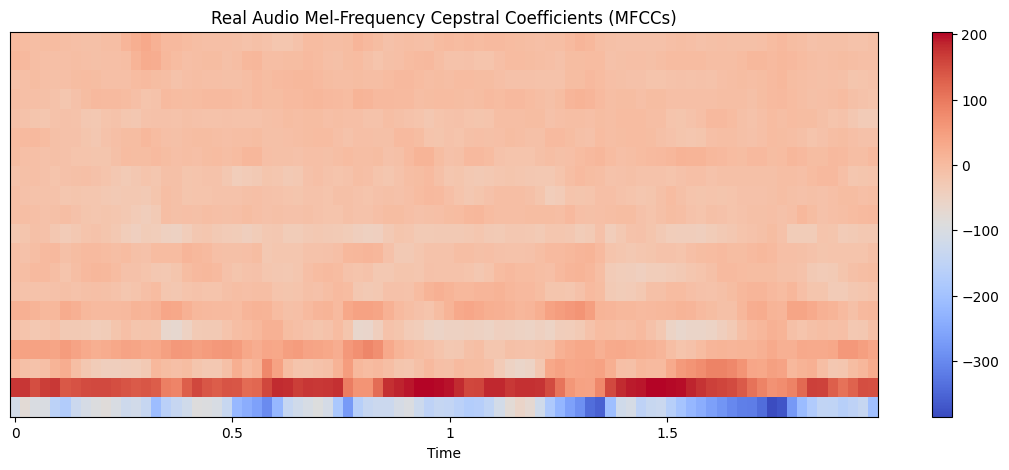

In [37]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/fake/recording1.wav_norm_mono.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

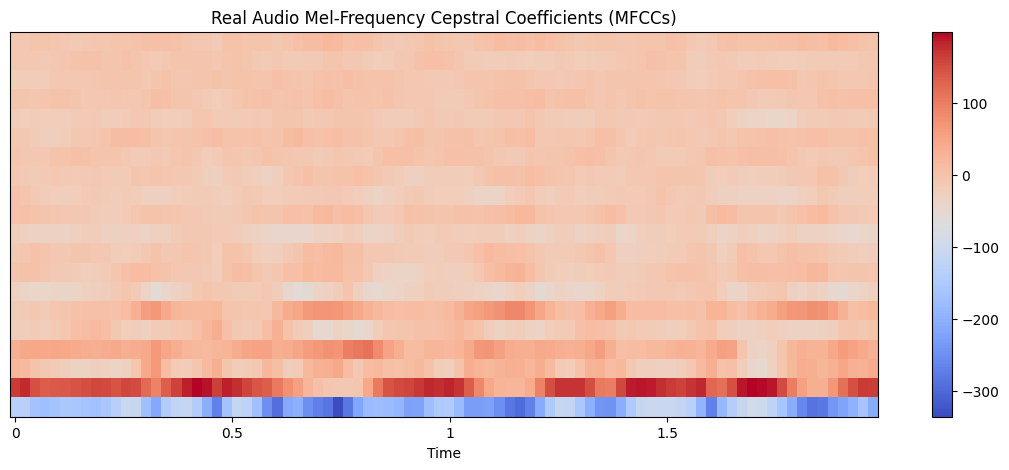

In [38]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/fake/recording1013.wav_norm_mono.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

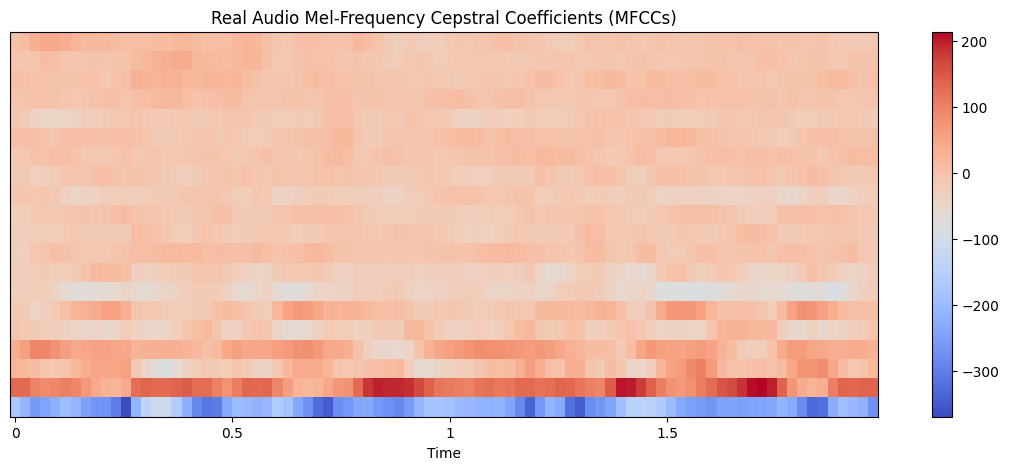

In [39]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/real/recording10006.wav_norm_mono.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

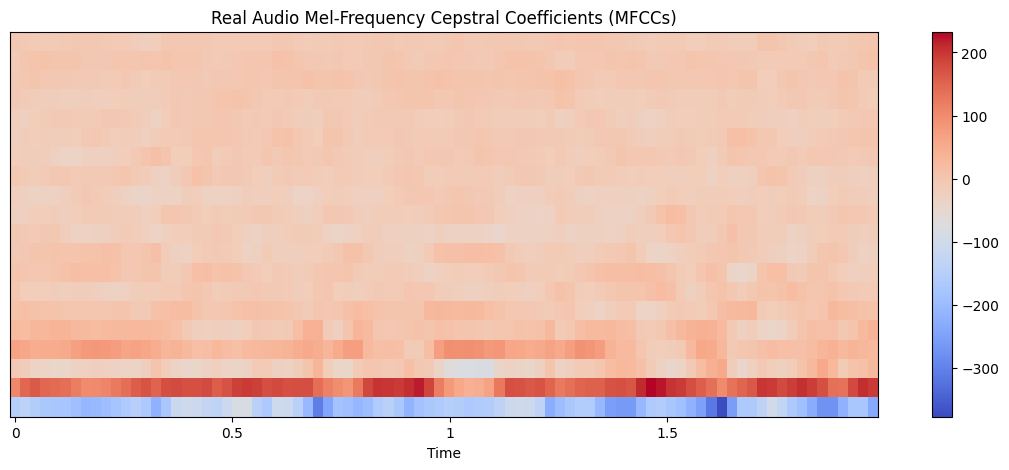

In [40]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-rerec/for-rerecorded/training/real/recording10039.wav_norm_mono.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

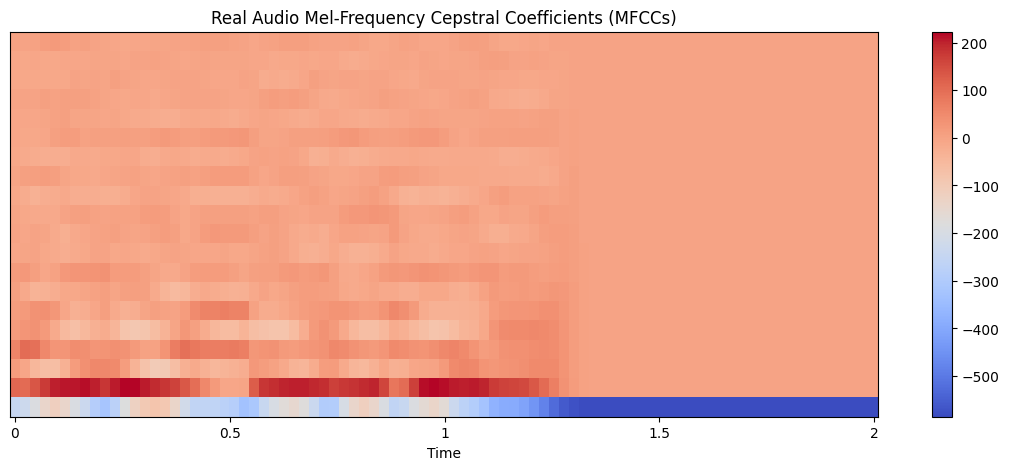

In [41]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/fake/file10058.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

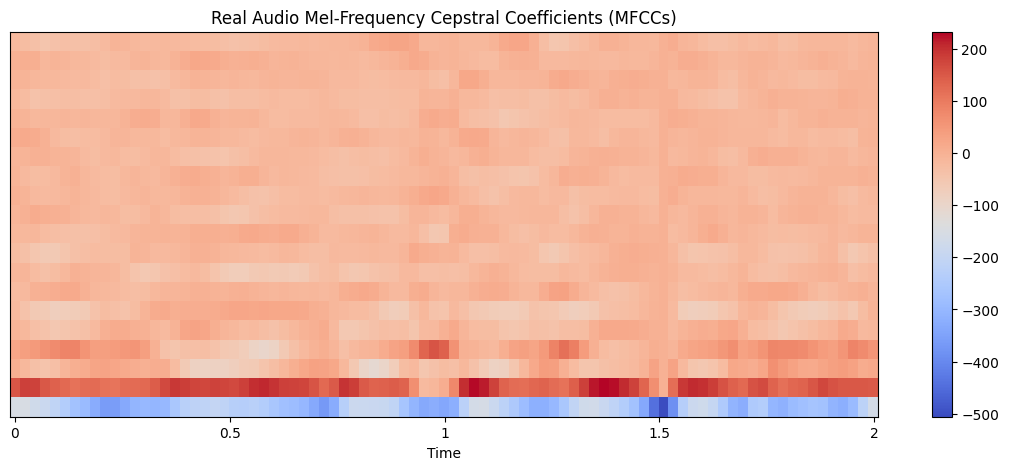

In [42]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/fake/file10286.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

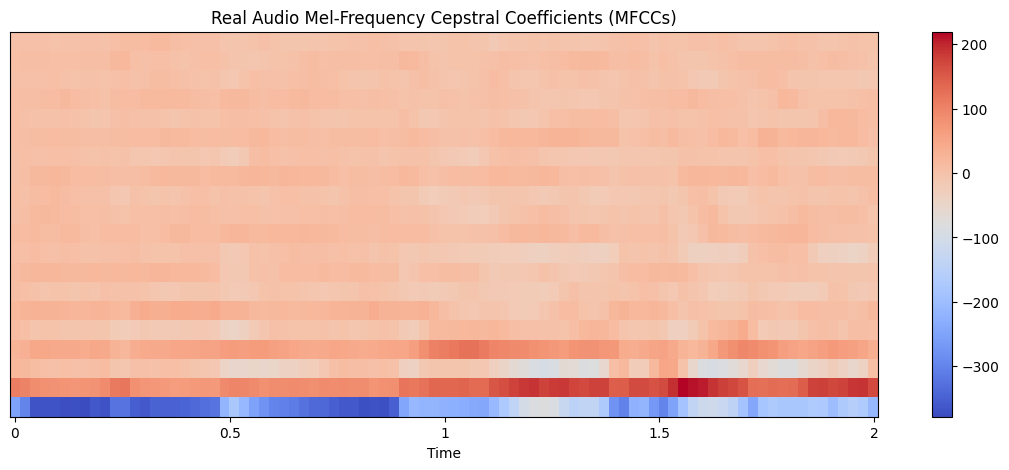

In [43]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/real/file10075.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

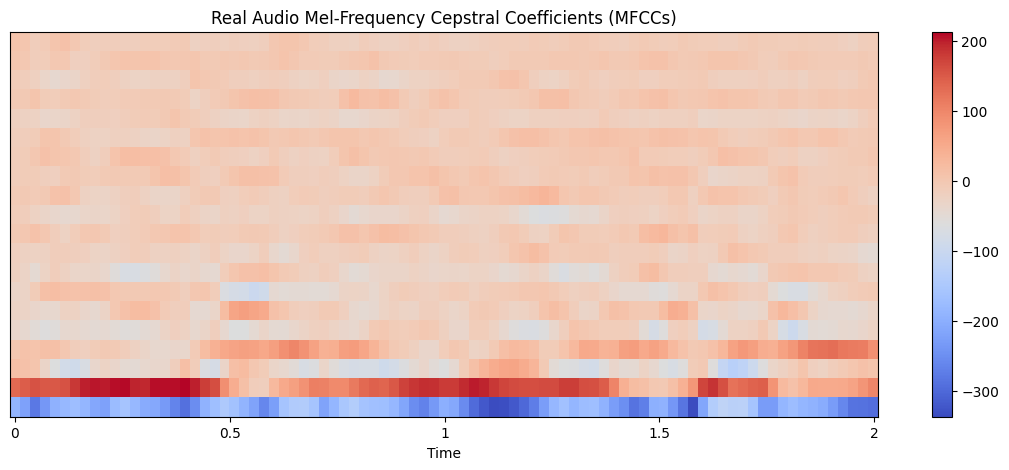

In [44]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-2sec/for-2seconds/training/real/file10269.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

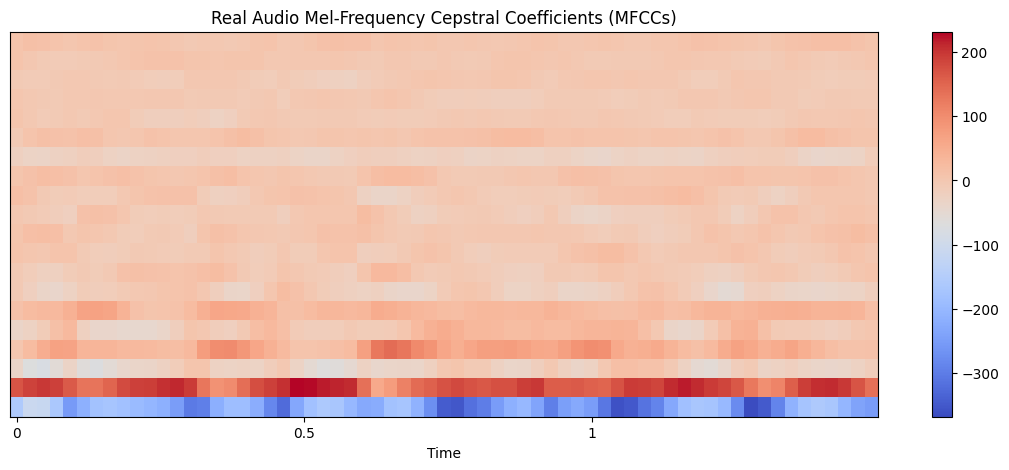

In [45]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/training/fake/file10016.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

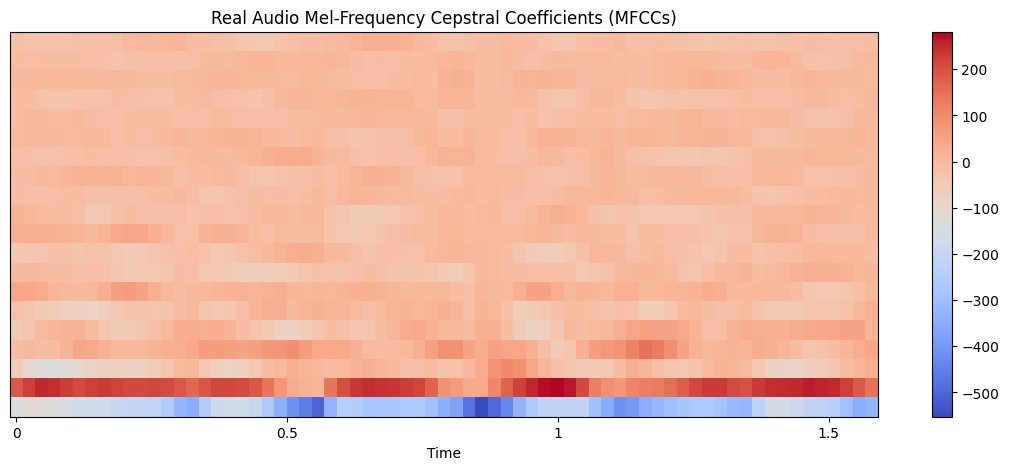

In [46]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/training/fake/file10064.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

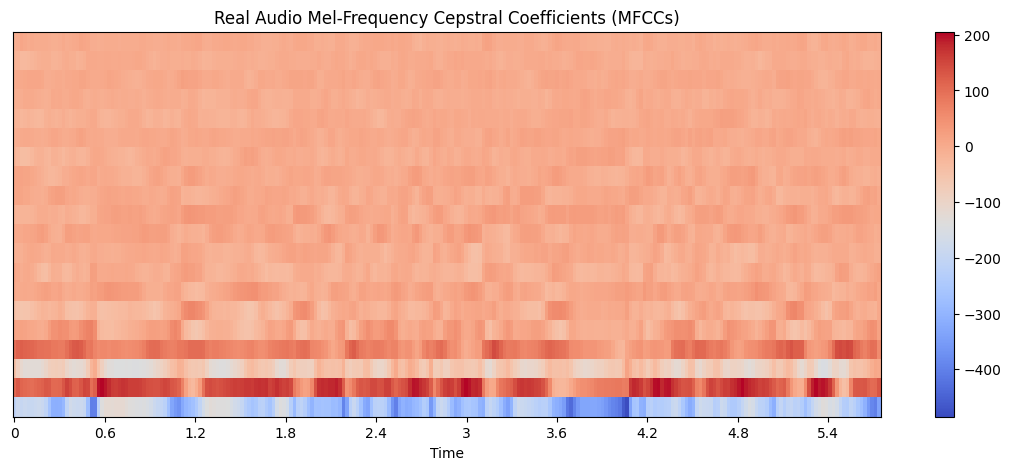

In [47]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/training/real/file10025.wav_16k.wav_norm.wav_mono.wav_silence.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

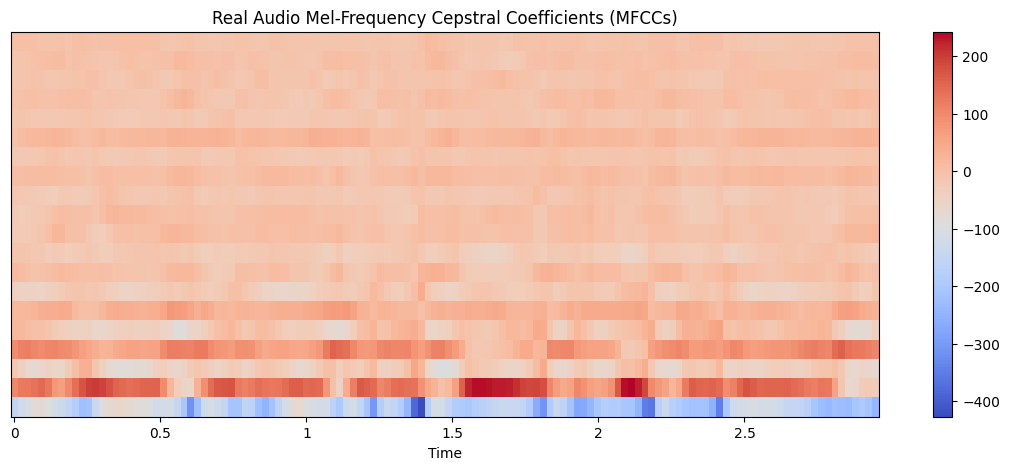

In [48]:
import librosa
import matplotlib.pyplot as plt

real_ad, real_sr = librosa.load('/kaggle/input/the-fake-or-real-dataset/for-norm/for-norm/training/real/file10095.wav_16k.wav_norm.wav_mono.wav_silence.wav')
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

In [49]:
import pandas as pd

data=pd.read_excel("/kaggle/input/rerec-audio-xlsx/rerec_audio.xlsx")


In [50]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# df.loc[:, 'C':'E']

# Convert to DataFrame
df = pd.DataFrame(data)
df1=df.iloc[:,1:41]

# print(df1)
# Initialize MinMaxScaler with desired range (0, 1 by default)
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply Min-Max normalization
normalized_data = scaler.fit_transform(df1)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=df1.columns)
# print(df.iloc[:,41])
normalized_df["LABEL"]=df.iloc[:,41]
normalized_df.insert(0, "AUDIO", df.iloc[:,0])


print("Original Data:")
print(df)
print("\nNormalized Data:")
print(normalized_df)



Original Data:
             AUDIO      MFCC_0      MFCC_1     MFCC_2     MFCC_3     MFCC_4  \
0          AUDIO 1 -204.293182  155.334351  12.078605  30.018124   7.137199   
1          AUDIO 2 -206.292389  125.856575   9.826826  40.660130 -38.902798   
2          AUDIO 3 -233.224564  164.963974 -38.348644  49.306095 -20.412888   
3          AUDIO 4 -158.866623  147.527008   2.515292  52.498569 -17.811068   
4          AUDIO 5 -304.994537  162.594955  40.751934  -3.574220 -11.813849   
...            ...         ...         ...        ...        ...        ...   
10203  AUDIO 10204 -221.205414  140.908203   6.261117  29.758522 -31.344320   
10204  AUDIO 10205 -154.527130  153.846451  -9.723347  21.997433 -18.574005   
10205  AUDIO 10206 -158.313690  122.770607   4.929123  49.259727 -34.499729   
10206  AUDIO 10207 -169.652679  179.840500   8.028708  29.831821  -3.372279   
10207  AUDIO 10208 -196.727417  102.709068 -11.926869  46.425983 -41.250317   

          MFCC_5     MFCC_6     MFCC

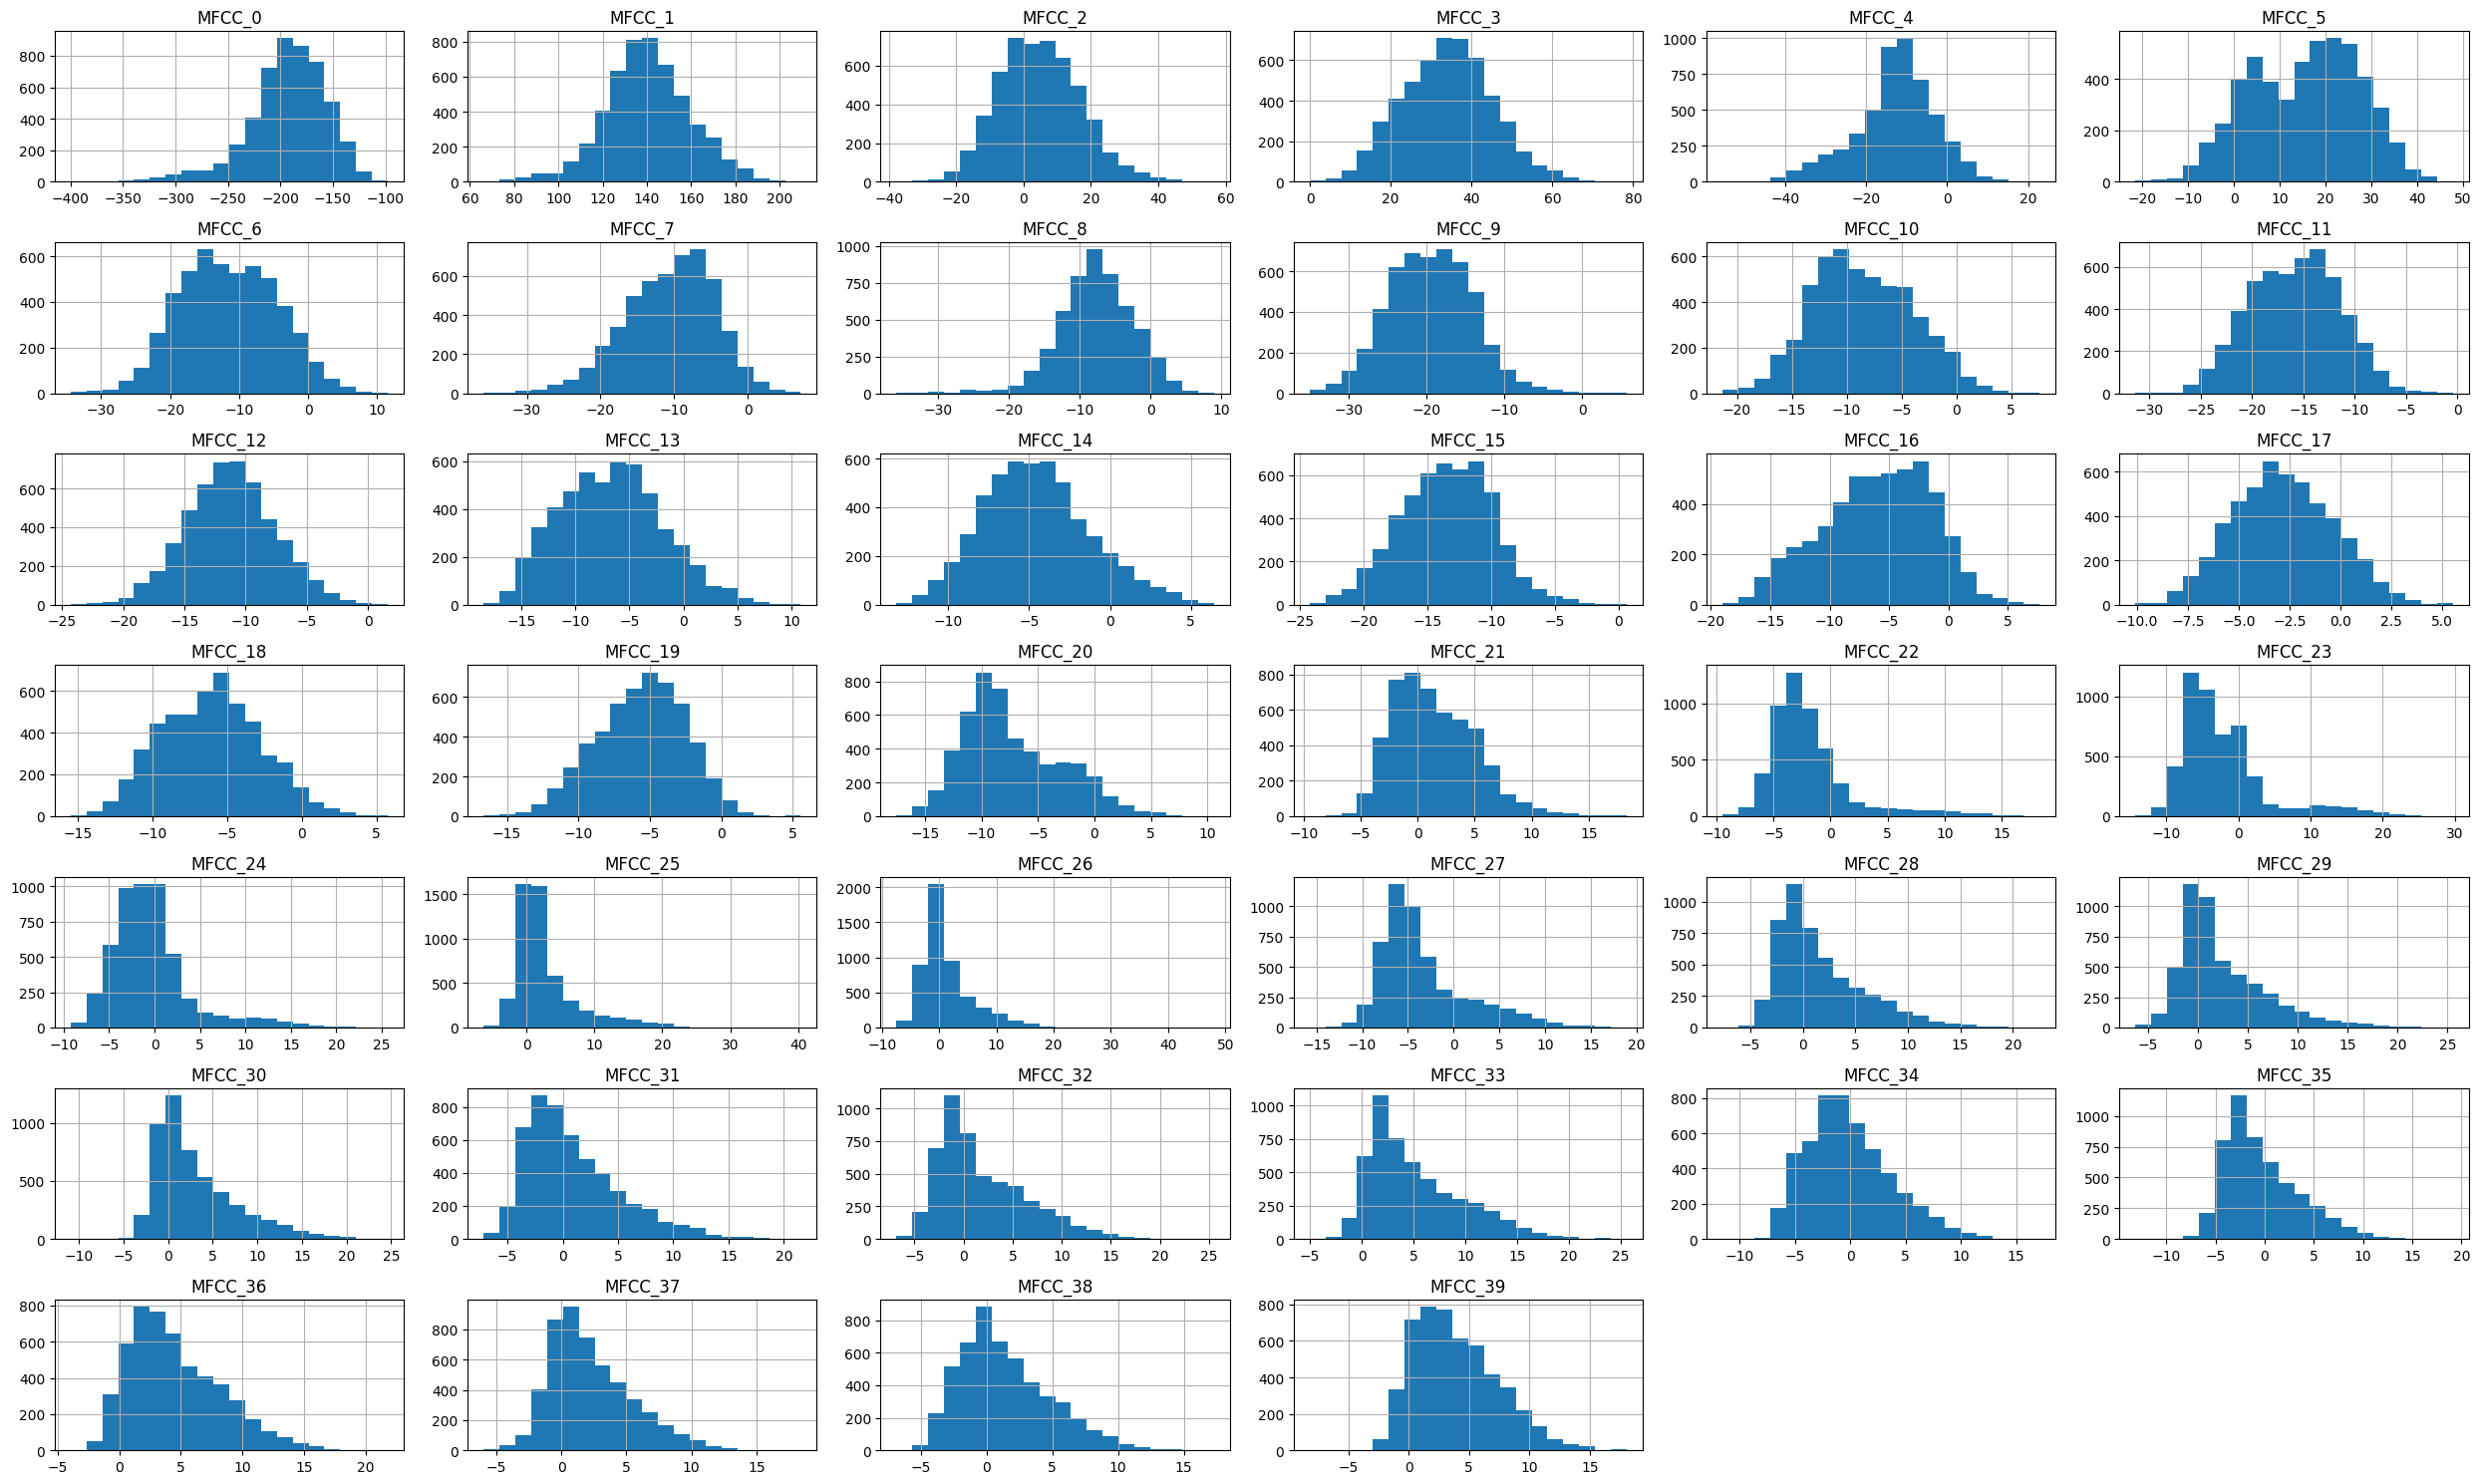

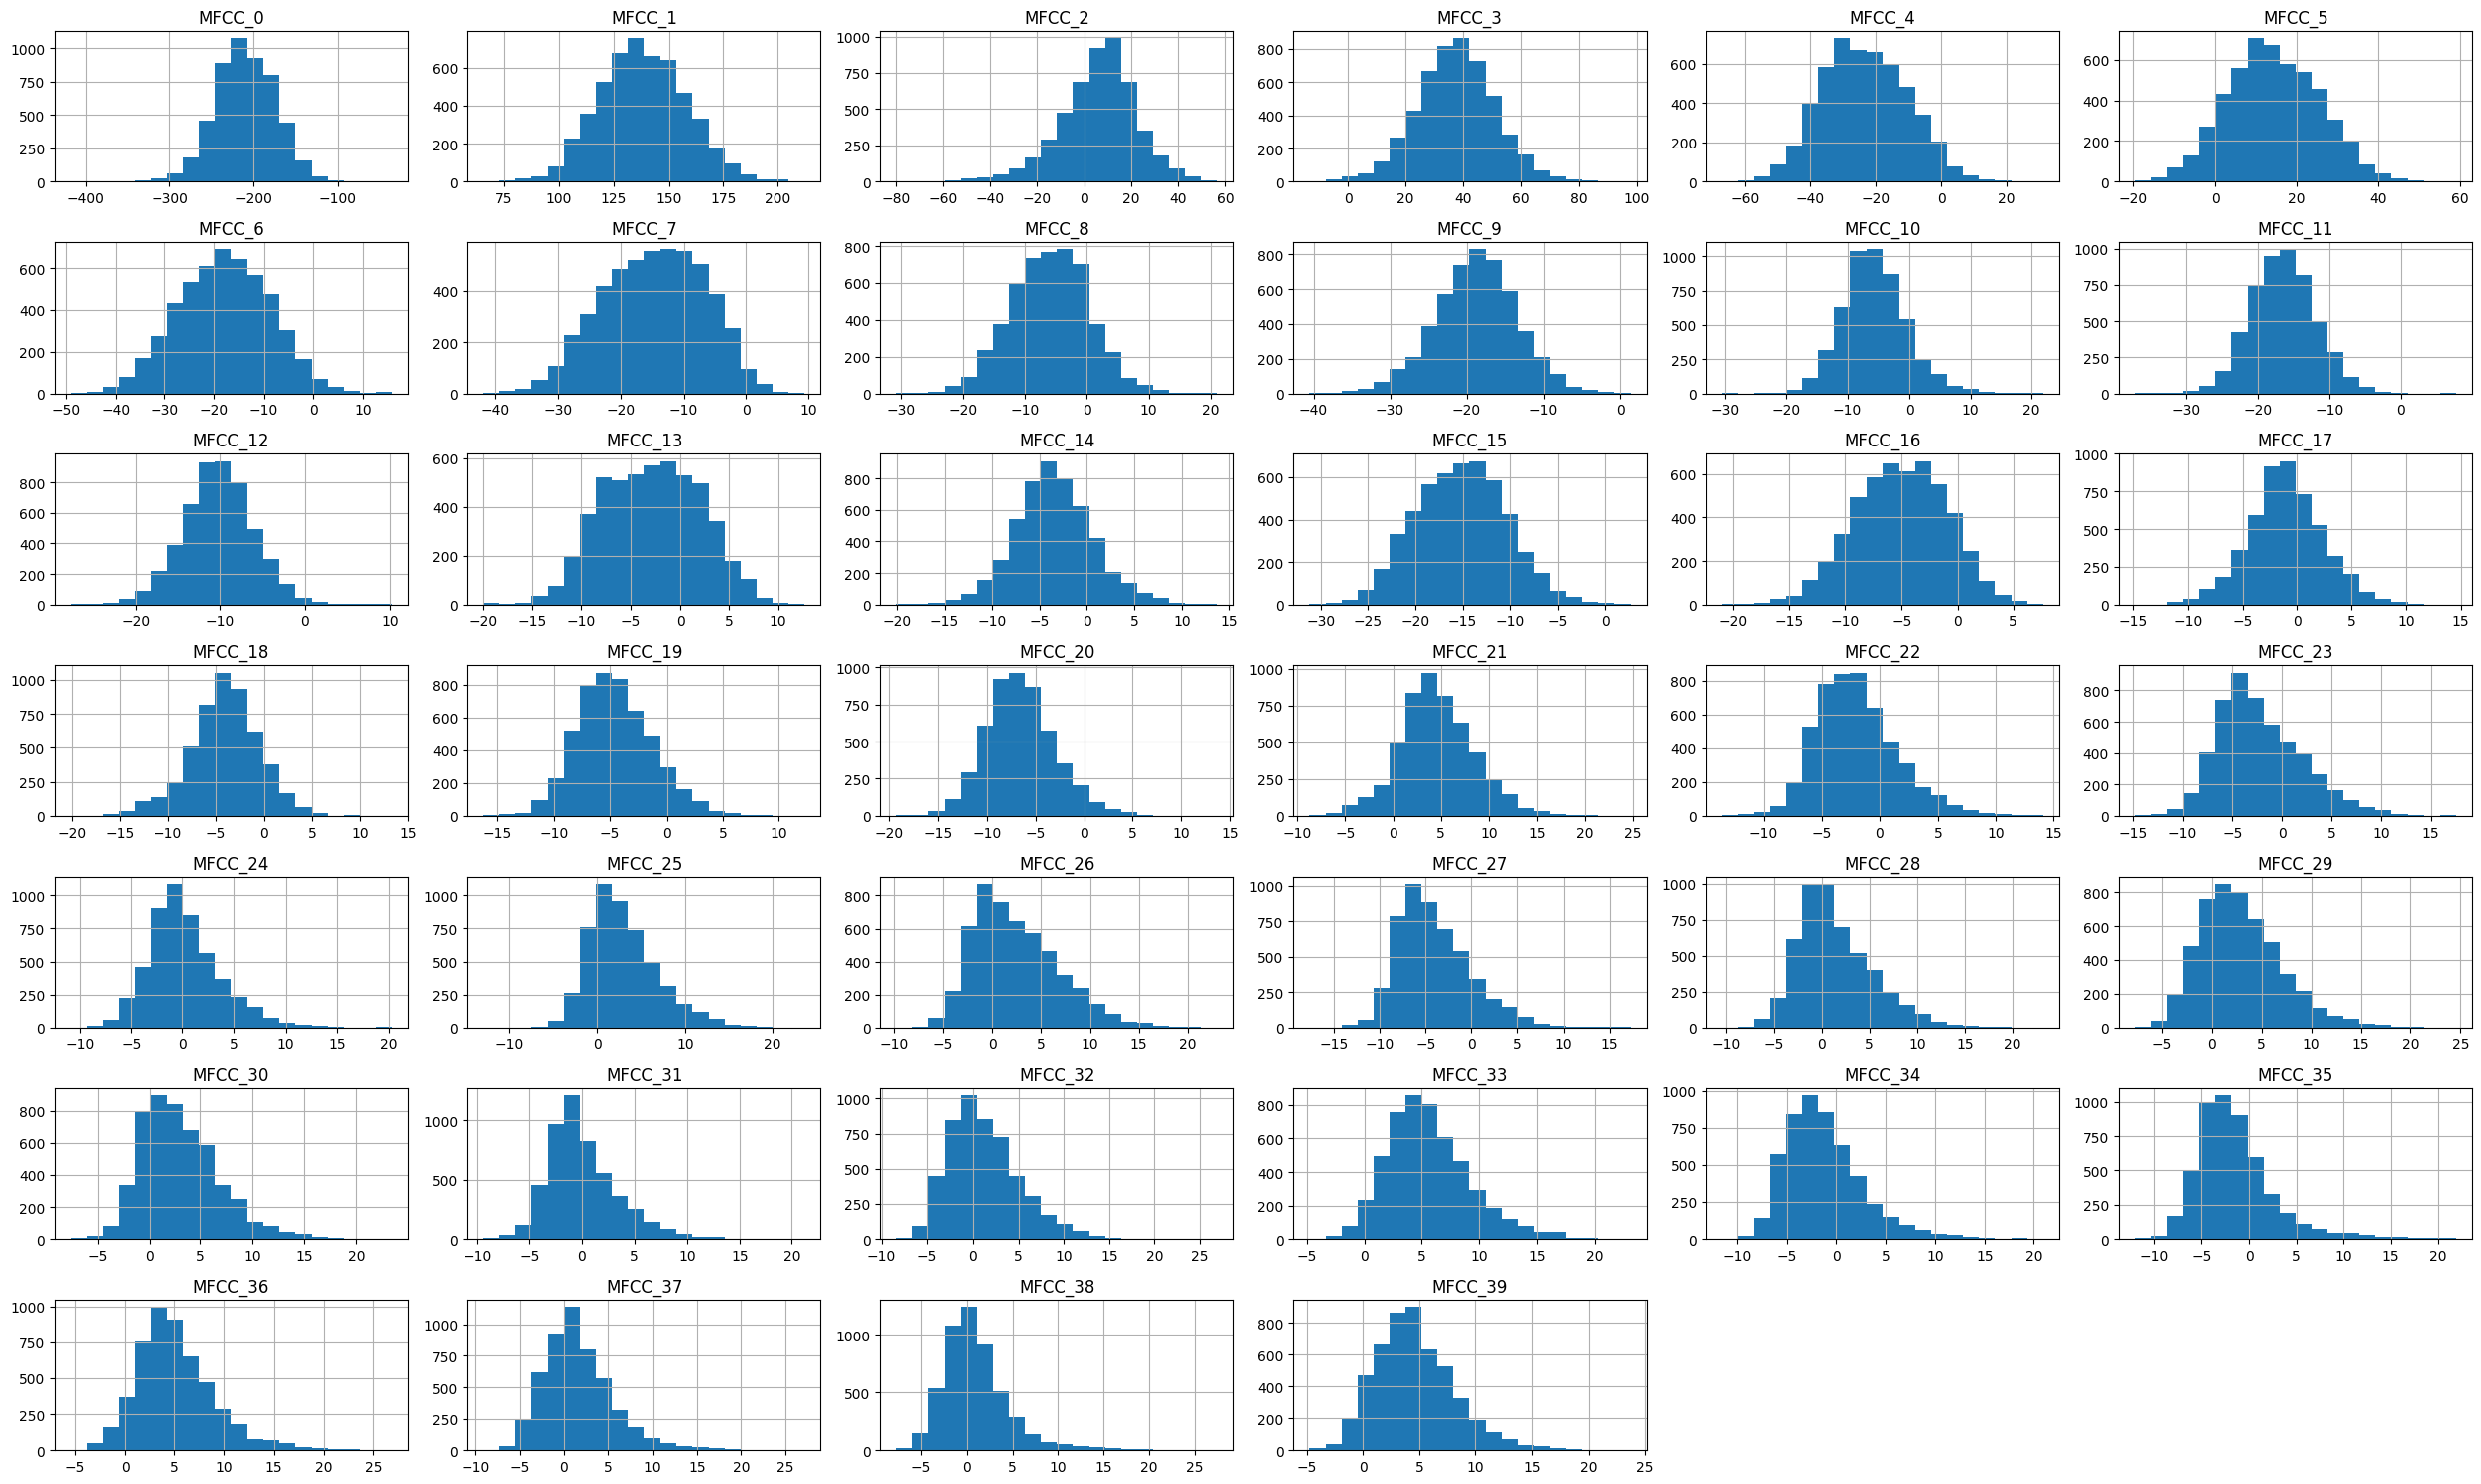

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your dataset file)
# Ensure that you have a column labeled 'output' or rename it accordingly
data = pd.read_excel("/kaggle/input/rerec-audio-xlsx/rerec_audio.xlsx")

# Check the unique categories in the output column
output_categories = data['LABEL'].unique()

# # Visualize the distribution of categories in the output column
# plt.figure(figsize=(10, 6))
# sns.countplot(data=data, x='LABEL', palette='viridis')
# plt.title('Distribution of Output Categories')
# plt.xlabel('Output Categories')
# plt.ylabel('Count')
# plt.show()
df=pd.DataFrame(data)
# Separate the data by categories
for category in output_categories:
    subset = df[df['LABEL'] == category]
    
    # Scatter plot for two numerical columns by category
    subset.hist(bins=20, figsize=(25, 15))

# plt.show()
#     sns.histplot(data=subset, x='MFCC_0', y='LABEL', label=category)
#     plt.title(f'Scatter Plot for Output Category: {category}')
    plt.xlabel(category)
    plt.ylabel('Feature 2')
    plt.tight_layout()

#     plt.legend()
    plt.show()

# If you have multiple numerical columns, you can use pairplot to visualize relationships
# sns.pairplot(data, hue='LABEL', palette='viridis')
# plt.suptitle('Pair Plot of Features by Output Category', y=1.02)
# plt.show()
